# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
# will involve iqr and quartiles so check statistincs in day 3 
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
summary_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

In [3]:
# Display the data table for preview
summary_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
total_mice = len(summary_df["Mouse ID"].unique())
total_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# use duplicated to isolate duplicated values
duplicate_mice_df = summary_df[summary_df.duplicated()]
# call the specified column Mouse ID and convert into an array so it becomes callable in loc later
duplicate_mice = duplicate_mice_df["Mouse ID"].array
duplicate_mice[0]

'g989'

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# use loc to find all of the duplicates. In this case there is only 1
# there is no need for a list comphrension to iterate through an array of duplicates
duplicate_mice_all = summary_df.loc[summary_df["Mouse ID"] == duplicate_mice[0]]
duplicate_mice_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
summary_df = summary_df[summary_df["Mouse ID"] != duplicate_mice[0]]
summary_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Checking the number of mice in the clean DataFrame.
# need to repeat assignment to update it
total_mice = len(summary_df["Mouse ID"].unique())
total_mice

248

## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
quartile_df = summary_df.loc[(summary_df["Drug Regimen"] == "Capomulin") | (summary_df["Drug Regimen"] == "Ramicane") |
                            (summary_df["Drug Regimen"] == "Infubinol") | (summary_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
quartile_data = quartile_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
#quartile_data

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_quartile = pd.merge(quartile_df, quartile_data, on = "Mouse ID")

# make an empty list to help appending later
timepoint_list = []

# iterate through the merged dataframe to filter out the final timepoints by matching the initial and newly calculated timepoint
for i in merge_quartile.iterrows(): 
    if i[1]["Timepoint_x"] == i[1]["Timepoint_y"]:
        timepoint_list.append(i[1])

# place the list into dataframe and assign in the columns used in the previous dataframes 
to_box_df = pd.DataFrame(timepoint_list, columns=['Mouse ID', 'Timepoint_x', 'Tumor Volume (mm3)','Metastatic Sites',
                                          'Drug Regimen','Sex','Age_months','Weight (g)','Timepoint_y'])


,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
9,b128,45,38.982878,2,Capomulin,Female,9,22,45
11,c326,5,36.321346,0,Infubinol,Female,18,25,5
21,c139,45,72.226731,2,Infubinol,Male,11,28,45
23,v339,5,46.250112,0,Infubinol,Male,20,26,5
30,a577,30,57.031862,2,Infubinol,Female,6,25,30


Infubinol's potential outlier(s): 36


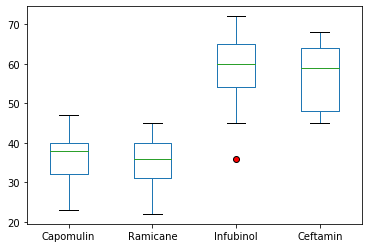

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# create an empty dictionary to store the lists for plotting 
tumor_vol_dict = {}

# iterate through the list 
for drug in treatment_list:

    # iterrate through to_box which has cut the
    for i in to_box_df.iterrows():
  
        if drug == (i[1]["Drug Regimen"]): 
            tumor_vol_list.append(int(i[1]["Tumor Volume (mm3)"]))
 
    # Calculate the IQR and upper and lower bounds 
    lowerq = np.percentile(tumor_vol_list, 25)
    upperq = np.percentile(tumor_vol_list, 75)
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #iterate through the list to see if any of the values are outside the lower and upper bound
    for x in tumor_vol_list:
        if (x > upper_bound) | (x < lower_bound): 
            # if found, print out a statement saying that an outlier has been found and its value
            print(f"{drug}'s potential outlier(s): {x}")
    
    # put the tumor vol list into the dictionary and make the treatment_list value the key
    tumor_vol_dict[f"{drug}"] = tumor_vol_list
    
    # reset tumor vol for the next drug type from treatment list
    tumor_vol_list = []

# create a dictionary that will color any outliers when passed 
outlier_highlight = dict(markerfacecolor = "red", marker = "o")

#make a final df of the now completed dictionary 
box_plotter_df = pd.DataFrame(tumor_vol_dict)

# new figure

#plot the dictionary and pass in the outlier higlight to flierprops to colors the detected outliers
box_plotter_df.plot(kind="box", flierprops = outlier_highlight)

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


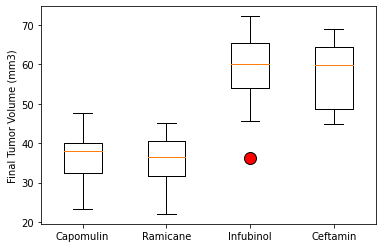

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

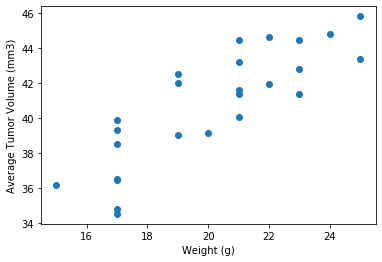

In [14]:
# use loc to filter for Capomulin 
scatter_df = summary_df.loc[summary_df["Drug Regimen"] == "Capomulin"]

# groupby mouse and use mean on the whole row 
# this will combine their entries into one row with the averaged values in it 
scatter_average = scatter_df.groupby(["Mouse ID"]).mean()

# plot the weight as x and the volume as y
plt.scatter(scatter_average["Weight (g)"],scatter_average["Tumor Volume (mm3)"])

#label the axes accordingly
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


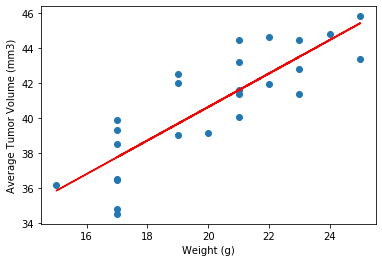

In [15]:
# Calculate the correlation coefficient (r value) and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# use the chart from before (no need for subplots)
x_values = scatter_average["Weight (g)"]
y_values = scatter_average["Tumor Volume (mm3)"]

# make the line using the sci py linregress to compute it
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is: {rvalue:.2f}")
plt.show()